<a href="https://colab.research.google.com/github/MWFK/TimeSeries_Sequence_with_TensorFlow/blob/main/5-%20TimeSeries_Sequences_Benchmarking_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credits

In [11]:
# Author: Mouafek Ayadi (but not the original code creator!)
# Contact: mouafek.ayadi@esprit.tn
#          https://www.linkedin.com/in/mouafek-ayadi/
# Date: 2019/2020

# The source Code have been developed based on deeplearning.ai courses materials, tensorflow.org documentation and other open source resources.
# that have been carefully documented in a separate document that you should find it alongside this notebook.
# The original code is under the Apache License, Version 2.0 (the "License");

# Ongoing
1- Add the fitting time to the benchmark list

2- Add Tensorboard

# Librairies

In [12]:
import tensorflow as tf
print(tf.__version__)

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.12.0


# Visualization Function

In [13]:
def plot_series(time, series, title, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

# Download Dataset

In [14]:
# https://www.kaggle.com/robervalt/sunspots
# unspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas.
# They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection.
# Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /content/data/Sunspots.csv

--2023-06-22 07:02:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-22 07:02:06 ERROR 404: Not Found.



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!unzip -o "/content/drive/MyDrive/Share/datasets/sunspotes.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/Share/datasets/sunspotes.zip
  inflating: /content/data/Sunspots.csv  


# Import & Visualize Data

Row
['0', '1749-01-31', '96.7']
['1', '1749-02-28', '104.3']
['2', '1749-03-31', '116.7']
['3', '1749-04-30', '92.8']
['4', '1749-05-31', '141.7']
['5', '1749-06-30', '139.2']
['6', '1749-07-31', '158.0']
['7', '1749-08-31', '110.5']
['8', '1749-09-30', '126.5']
['9', '1749-10-31', '125.8']
['10', '1749-11-30', '264.3']
['11', '1749-12-31', '142.0']
['12', '1750-01-31', '122.2']
['13', '1750-02-28', '126.5']
['14', '1750-03-31', '148.7']
['15', '1750-04-30', '147.2']
['16', '1750-05-31', '150.0']
['17', '1750-06-30', '166.7']
['18', '1750-07-31', '142.3']
['19', '1750-08-31', '171.7']
['20', '1750-09-30', '152.0']
['21', '1750-10-31', '109.5']
['22', '1750-11-30', '105.5']
['23', '1750-12-31', '125.7']
['24', '1751-01-31', '116.7']
['25', '1751-02-28', '72.5']
['26', '1751-03-31', '75.5']
['27', '1751-04-30', '94.0']
['28', '1751-05-31', '101.2']
['29', '1751-06-30', '84.5']
['30', '1751-07-31', '110.5']
['31', '1751-08-31', '99.7']
['32', '1751-09-30', '39.2']
['33', '1751-10-31', '38

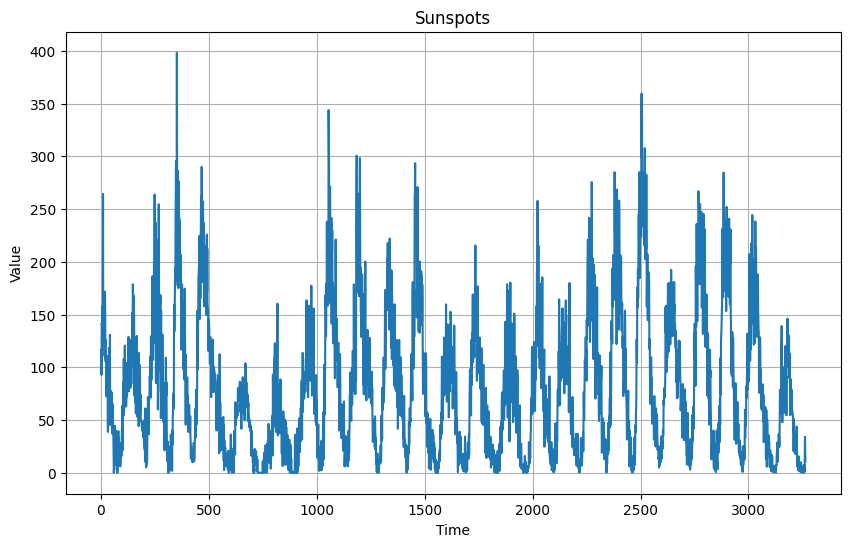

In [17]:
time_step = []
sunspots = []

with open('/content/data/Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  print('Row')
  for row in reader:
    print(row)
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

print('Sunspots\n', sunspots)
print('Time_Step\n', time_step)

# Convert to numpy array so it's works with tensorflow afterwards
series = np.array(sunspots)
time = np.array(time_step)
print('series\n', series)
print('time\n', time)

title = "Sunspots"
plt.figure(figsize=(10, 6))
plot_series(time, series, title)

print(series.shape)
print(time.shape)

# Split Data

In [18]:
split_time = 2500 # We have 10 years worth of data (3650) so the split time is more 75%

time_train = time[:split_time] # 0..2500    => 2500
x_train    = series[:split_time]
time_valid = time[split_time:] # 2501..3650 => 1150
x_valid    = series[split_time:]

window_size         = 30
batch_size          = 32
shuffle_buffer_size = 1000

# DataFrame that will have the models scores
columns = ['Model', 'Layers', 'Units_per_Layer', 'Optimizer', 'MAE Metric', 'Huber Loss']
Benchmark = pd.DataFrame(columns=columns)

# Create a window

https://www.tensorflow.org/api_docs/python/tf/expand_dims

In [19]:
########################################################### [1]
# print(series)
# array([ 96.7, 104.3, 116.7, ...,  13.2,  15.9,   1.6])

# series = tf.expand_dims(series, axis=-1)
# print(series)
# array([[ 96.7],
#       [104.3],
#       [116.7],
#       ...,
#       [ 13.2],
#       [ 15.9],
#       [  1.6]])>


# tf.expand_dims(input, axis, name=None)
# image = tf.zeros([10,10,3])

# tf.expand_dims(image, axis=0).shape.as_list()
# [1, 10,10,3]

# tf.expand_dims(image, axis=1).shape.as_list()
# [10, 1,10,3]

# tf.expand_dims(image, axis=-1).shape.as_list()
# [10,10,3, 1]

https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices




In [50]:
# ########################################################### [2]
dataset = tf.data.Dataset.from_tensor_slices([1,2,3])
for element in dataset:
  print(element)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [21]:
# ############################################################ [3]

# # Initialize the series again
# sunspots = []
# with open('/content/data/Sunspots.csv') as csvfile:
#   reader = csv.reader(csvfile, delimiter=',')
#   next(reader)
#   for row in reader:
#     sunspots.append(float(row[2]))
# series = np.array(sunspots)

# # Test the flat_map function
# # dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# # for element in dataset:
# #   print(element)

# # dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
# # list(dataset.as_numpy_iterator())

# import time
# series = tf.expand_dims(series, axis=-1)                      # [1] explanation above
# ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
# ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # window slide by one step each time
# ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] each tensor will have this shape (31,1)
# for element in ds:
#   print(element)

In [22]:
# ############################################################ [4]

# # Initialize the series again
# sunspots = []
# with open('/content/data/Sunspots.csv') as csvfile:
#   reader = csv.reader(csvfile, delimiter=',')
#   next(reader)
#   for row in reader:
#     sunspots.append(float(row[2]))
# series = np.array(sunspots)

# # Test the flat_map function
# # dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# # for element in dataset:
# #   print(element)

# # dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
# # list(dataset.as_numpy_iterator())

# import time
# series = tf.expand_dims(series, axis=-1)                      # [1] explanation above
# ds = tf.data.Dataset.from_tensor_slices(series)               # [2] explanation above
# ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # window slide by one step each time
# ds = ds.flat_map(lambda w: w.batch(window_size + 1))          # [3] each tensor will have this shape (31,1)

# # Explanation of he lambda function list
# #for w in ds:
#   #print(w[:-1]) # w[:-1] all elments except for the last one
#   #print(w[1:])  # w[1:]  all elements except the first one
#   #time.sleep(3)

# # without ds = ds.map(lambda w: (w[:-1], w[1:]))
# # the first window will start by 96 and end with 110. shape(31,1)
# # the second window will start by the value 104 and by the value 99 shape(31,1)
# # for element in ds:
# #   print(element)
# #   time.sleep(3)

# # with ds = ds.map(lambda w: (w[:-1], w[1:]))
# # the first window will start by 96 and end with 84. shape(30,1)
# # the second window will start by the value 104 and by the value 110 shape(30,1)
# # therefore each time we're skiping the 31th value of each windowd
# ds = ds.map(lambda w: (w[:-1], w[1:]))
# for element in ds:
#   print(element)
#   #time.sleep(3)

In [23]:
# ############################################################ [5]

# dataset = tf.data.Dataset.range(8)
# dataset = dataset.batch(3)
# print(list(dataset.as_numpy_iterator()))

# dataset = tf.data.Dataset.range(8)
# dataset = dataset.batch(3, drop_remainder=True)
# print(list(dataset.as_numpy_iterator()))

# Dataset creation
# ds = ds.batch(batch_size).prefetch(1)
# This returns a tf.data.Dataset object when a series is passed in along with the other arguments like window_size, batch_size, shuffle_buffer_size

# # Prefetch
# # ds = ds.batch(batch_size).prefetch(1)  print(ds) => shapes: ((None, None, 1), (None, None, 1))
# # print(list(ds.as_numpy_iterator())[0]) => two arrays
# # Creates a Dataset that prefetches elements from this dataset.
# # Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed.
# # This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

In [24]:
##################################################################################### Explanation of TF windowed dataset
# We're creating TF Windowed dataset, which have more methods than a regular dataset
# Represents a potentially large set of elements => tf.data.Dataset(variant_tensor)

def windowed_dataset(series, window_size, batch_size, shuffle_buffer): # [0] This returns a tf.data.Dataset object when a series is passed in along with the other arguments like window_size, batch_size, shuffle_buffer_size
                                                                       #     In this object each element is a batch of 32 windows and each window contains 30 values.

    series = tf.expand_dims(series, axis=-1)                           # [1] explanation above
    ds = tf.data.Dataset.from_tensor_slices(series)                    # [2] explanation above
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)      #     Maps map_func across this dataset and flattens the result. window slide by one step each time
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))               # [3] explanation above
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))                             # [4] explanation above => splitting data into input and target

    return ds.batch(batch_size).prefetch(1)                            # [5] explanation above

# Forecast function

In [25]:
# We take the DNN model, and we try to apply it to our windowed series
# So after training it will help us forecast batches of our windowed series
# we'll have 32 windowd with size of 30 in each batch, where each windowd will have one new value each time.
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    # No map or shuffle, this was done in the windowed_dataset()
    forecast = model.predict(ds)
    return forecast

# RNN Model

In [26]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

# Simple RNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]), # since our dataset is windowed, then we'll construct one tensor, through pending each windowd to the end of the tensor
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_rnn = model.fit(train_set, epochs=150)

Epoch 1/150
20/20 [==============================] - 8s 63ms/step - loss: 70186.3359 - mae: 70186.8359
Epoch 2/150
20/20 [==============================] - 1s 65ms/step - loss: 77941.4297 - mae: 77941.9297
Epoch 3/150
20/20 [==============================] - 1s 65ms/step - loss: 31011.9648 - mae: 31012.4629
Epoch 4/150
20/20 [==============================] - 2s 77ms/step - loss: 76246.7812 - mae: 76247.2812
Epoch 5/150
20/20 [==============================] - 3s 129ms/step - loss: 73339.8984 - mae: 73340.4062
Epoch 6/150
20/20 [==============================] - 2s 81ms/step - loss: 32898.7148 - mae: 32899.2148
Epoch 7/150
20/20 [==============================] - 1s 63ms/step - loss: 75010.4062 - mae: 75010.8984
Epoch 8/150
20/20 [==============================] - 2s 69ms/step - loss: 74398.5703 - mae: 74399.0703
Epoch 9/150
20/20 [==============================] - 2s 72ms/step - loss: 34027.4961 - mae: 34027.9961
Epoch 10/150
20/20 [==============================] - 1s 63ms/step - los

# RNN MAE and Loss

<Figure size 640x480 with 0 Axes>

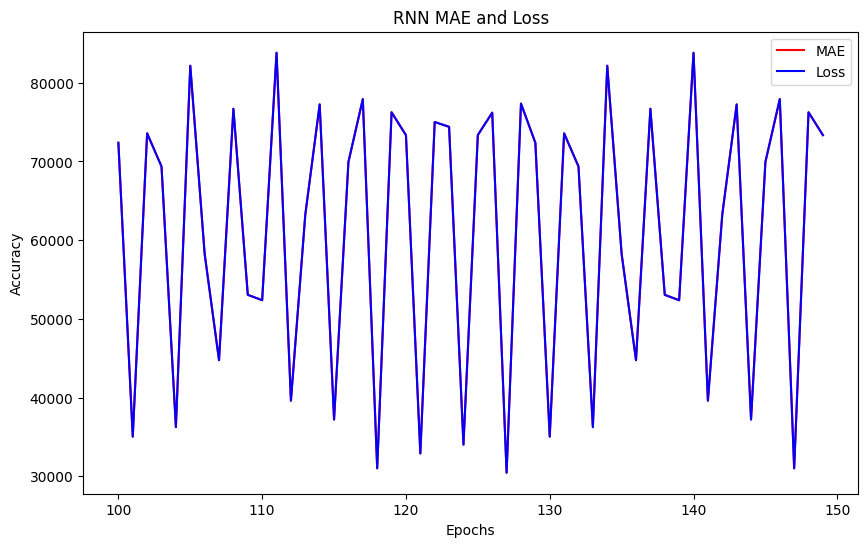

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_rnn.history['mae']
loss=history_rnn.history['loss']

epochs=range(len(loss)) # Get number of epochs


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('RNN MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [28]:
# Add Model Details to the benchmark list
columns = ['Model', 'Layers', 'Units_per_Layer','Optimizer', 'MAE Metric', 'Huber Loss']
Benchmark  = Benchmark.append(pd.Series(['RNN', '2*SimpleRNN', '40', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)
Benchmark

<ipython-input-28-0b12cee33f09>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['RNN', '2*SimpleRNN', '40', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.5,73342.0


# LSTM Model

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([

  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  #tf.keras.layers.Lambda(lambda x: x * 400)
])

# We have inferred from the previouss cell that the preferred Learning rate is 1e-5
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_lstm = model.fit(train_set,epochs=150)

Epoch 1/150
25/25 [==============================] - 7s 21ms/step - loss: 77.0070 - mae: 77.4967
Epoch 2/150
25/25 [==============================] - 1s 21ms/step - loss: 75.1389 - mae: 75.6361
Epoch 3/150
25/25 [==============================] - 1s 21ms/step - loss: 73.2248 - mae: 73.7216
Epoch 4/150
25/25 [==============================] - 1s 23ms/step - loss: 71.4705 - mae: 71.9670
Epoch 5/150
25/25 [==============================] - 1s 22ms/step - loss: 69.8805 - mae: 70.3770
Epoch 6/150
25/25 [==============================] - 1s 22ms/step - loss: 68.4594 - mae: 68.9560
Epoch 7/150
25/25 [==============================] - 1s 19ms/step - loss: 67.1750 - mae: 67.6718
Epoch 8/150
25/25 [==============================] - 1s 21ms/step - loss: 66.0157 - mae: 66.5119
Epoch 9/150
25/25 [==============================] - 1s 20ms/step - loss: 64.9717 - mae: 65.4691
Epoch 10/150
25/25 [==============================] - 1s 21ms/step - loss: 64.0162 - mae: 64.5131
Epoch 11/150
25/25 [=========

# LSTM MAE and Loss

<Figure size 640x480 with 0 Axes>

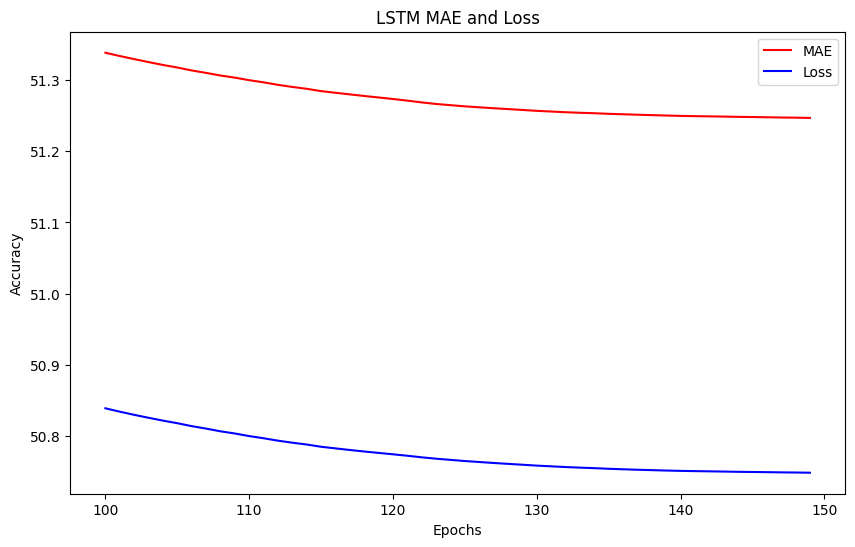

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_lstm.history['mae']
loss=history_lstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('LSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [31]:
# Add Model Details to the benchmark list
Benchmark  = Benchmark.append(pd.Series(['LSTM', '2*LSTM, 2*Dense', '2*40, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)
Benchmark

<ipython-input-31-cc209897603c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['LSTM', '2*LSTM, 2*Dense', '2*40, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.500000,73342.000000
1,LSTM,"2*LSTM, 2*Dense","2*40, 30 10","SGD(lr=1e-5, momentum=0.9)",51.246494,50.749012


# BLSTM Model

In [32]:
# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
# A common use-case for clear_session is releasing memory when building models and layers in a loop.
# Clears any internal variables, which means models will not impact later versions of themselves
tf.keras.backend.clear_session()

# This sets the graph-level seed.
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/random/set_seed
tf.random.set_seed(51)

# I's for operation level
np.random.seed(51)

# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
# A common use-case for clear_session is releasing memory when building models and layers in a loop.
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed BI-LSTM
model = tf.keras.models.Sequential([
  #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x),# Given a tensor input, this operation inserts a dimension of size 1 at the dimension index axis of input's shape. # https://www.tensorflow.org/api_docs/python/tf/expand_dims
                                                     #input_shape=[None])),     # This means that the model can take sequences of any length

  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),

  # The windowed_dataset() return two dimensional batches, with the first being the batch size and the second being the number of timesteps
  # But the RNN expects three dimensions, so the lambda layer, help fix the difference in dimensions, by adding expannding the array by one dimension

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),

  # input a sequence and don't output it, except for the last one (sequence to vector RNN), which is the default behavior of Keras TF,
  # otherwise we set the return_sequence=False and we we'll have (sequence to sequence)

  # The output of the layer is three dimensionals [batch_size * number_units(nulber of units in a cell) * overall_steps(number of cells)]

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0) #400.0

  # For example the activation function of the RNN use tanH function which have values between -1 and 1,
  # so we multiply the output by 100, so we can have the regular values of our input time series.
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), # Less sensitive to outliers
              optimizer=optimizer,
              metrics=["mae"])
history_blstm = model.fit(dataset, epochs=150)

Epoch 1/150
78/78 [==============================] - 7s 12ms/step - loss: 73.8578 - mae: 74.3562
Epoch 2/150
78/78 [==============================] - 1s 13ms/step - loss: 61.8463 - mae: 62.3447
Epoch 3/150
78/78 [==============================] - 2s 19ms/step - loss: 65.1846 - mae: 65.6829
Epoch 4/150
78/78 [==============================] - 2s 25ms/step - loss: 50.9345 - mae: 51.4325
Epoch 5/150
78/78 [==============================] - 2s 23ms/step - loss: 50.6506 - mae: 51.1483
Epoch 6/150
78/78 [==============================] - 1s 13ms/step - loss: 44.5720 - mae: 45.0694
Epoch 7/150
78/78 [==============================] - 1s 13ms/step - loss: 45.9340 - mae: 46.4314
Epoch 8/150
78/78 [==============================] - 1s 13ms/step - loss: 46.8605 - mae: 47.3581
Epoch 9/150
78/78 [==============================] - 1s 13ms/step - loss: 46.5759 - mae: 47.0737
Epoch 10/150
78/78 [==============================] - 1s 13ms/step - loss: 44.9159 - mae: 45.4135
Epoch 11/150
78/78 [=========

# BLSTM MAE & Loss

<Figure size 640x480 with 0 Axes>

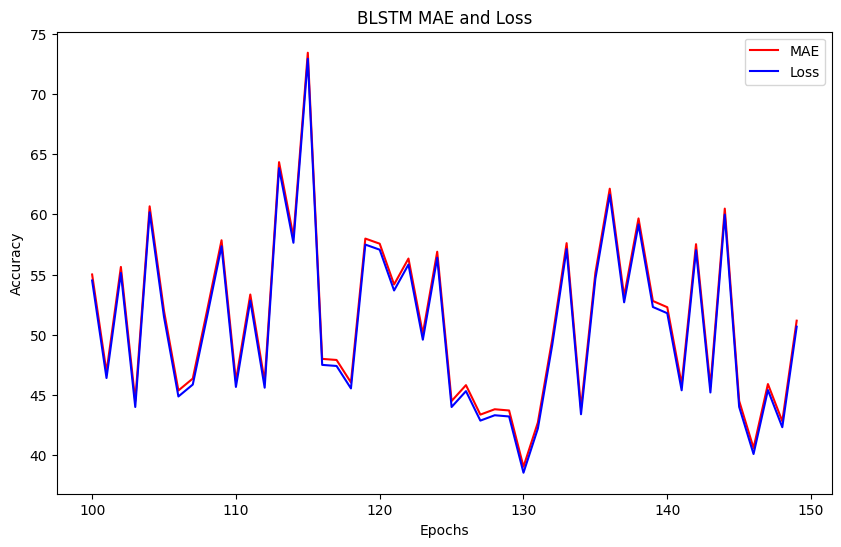

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_blstm.history['mae']
loss=history_blstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('BLSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [34]:
# Add Model Details to the benchmark list
Benchmark  = Benchmark.append(pd.Series(['BLSTM', '2*BLSTM', '32', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)
Benchmark

<ipython-input-34-4d13cf12cb4d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['BLSTM', '2*BLSTM', '32', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.500000,73342.000000
1,LSTM,"2*LSTM, 2*Dense","2*40, 30 10","SGD(lr=1e-5, momentum=0.9)",51.246494,50.749012
2,BLSTM,2*BLSTM,32,"SGD(lr=1e-5, momentum=0.9)",51.174549,50.676487


# CNN LSTM Model

In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size) # We take a window of x_train
print("train_set= ",train_set)
print("\n x_train.shape= ",x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]), # We have specified the input shape here so we need to change the windowed_dataset() => it works but foes not give the same result
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_lstm = model.fit(train_set, epochs=150)


train_set=  <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

 x_train.shape=  (2500,)


Epoch 1/150
10/10 [==============================] - 9s 32ms/step - loss: 18110.4805 - mae: 18110.9824
Epoch 2/150
10/10 [==============================] - 1s 34ms/step - loss: 930.1096 - mae: 930.6096
Epoch 3/150
10/10 [==============================] - 1s 34ms/step - loss: 2900.6819 - mae: 2901.1819
Epoch 4/150
10/10 [==============================] - 1s 36ms/step - loss: 3472.5537 - mae: 3473.0537
Epoch 5/150
10/10 [==============================] - 1s 35ms/step - loss: 575.8807 - mae: 576.3805
Epoch 6/150
10/10 [==============================] - 1s 37ms/step - loss: 582.4691 - mae: 582.9679
Epoch 7/150
10/10 [==============================] - 0s 34ms/step - loss: 827.4174 - mae: 827.9174
Epoch 8/150
10/10 [==============================] - 1s 35ms/step - loss: 917.0406 - mae: 917.5406
Epoch 9/150
10/10 [==============================] - 0s 33ms/step - loss: 770.2053 - mae: 770.7053
Epoch 10/150
10/10 [==============================] - 1s 39ms/step - loss: 889.1635 - mae: 889.6635
E

# CNN LSTM MAE & Loss

<Figure size 640x480 with 0 Axes>

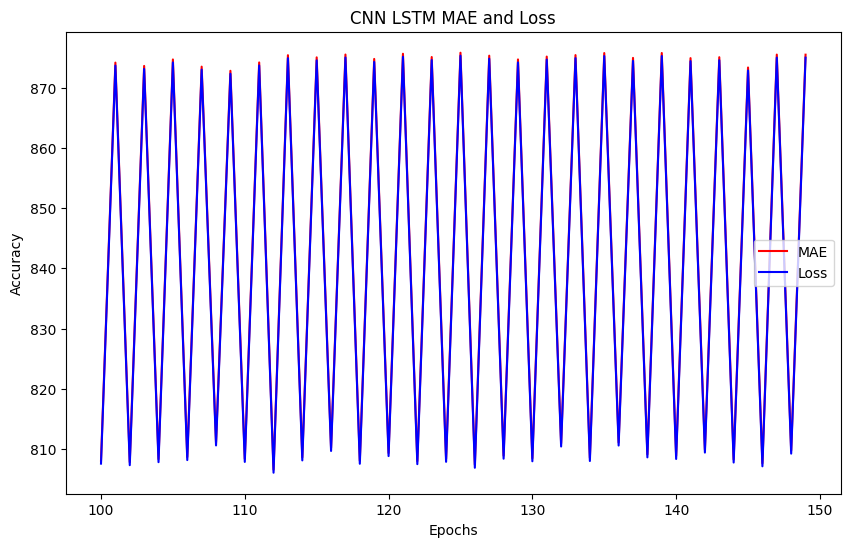

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_lstm.history['mae']
loss=history_cnn_lstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN LSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [37]:
# Add Model Details to the benchmark list
Benchmark  = Benchmark.append(pd.Series(['CNN LSTM', 'Conv1D, 2*LSTM, 2*Dense', '32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)
Benchmark

<ipython-input-37-361075e1da26>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['CNN LSTM', 'Conv1D, 2*LSTM, 2*Dense', '32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.500000,73342.000000
1,LSTM,"2*LSTM, 2*Dense","2*40, 30 10","SGD(lr=1e-5, momentum=0.9)",51.246494,50.749012
2,BLSTM,2*BLSTM,32,"SGD(lr=1e-5, momentum=0.9)",51.174549,50.676487
3,CNN LSTM,"Conv1D, 2*LSTM, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",875.477905,874.977905


# CNN BLSTM Model

In [38]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed CNN BLSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),

  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),

  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),

  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),

  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_blstm = model.fit(dataset, epochs=150)

Epoch 1/150
10/10 [==============================] - 12s 56ms/step - loss: 106857.2969 - mae: 106857.7891
Epoch 2/150
10/10 [==============================] - 1s 49ms/step - loss: 2009.0981 - mae: 2009.5981
Epoch 3/150
10/10 [==============================] - 1s 41ms/step - loss: 1360.4607 - mae: 1360.9604
Epoch 4/150
10/10 [==============================] - 1s 42ms/step - loss: 1590.4110 - mae: 1590.9110
Epoch 5/150
10/10 [==============================] - 1s 44ms/step - loss: 1814.7714 - mae: 1815.2710
Epoch 6/150
10/10 [==============================] - 1s 48ms/step - loss: 915.3234 - mae: 915.8234
Epoch 7/150
10/10 [==============================] - 1s 46ms/step - loss: 2899.2510 - mae: 2899.7510
Epoch 8/150
10/10 [==============================] - 1s 46ms/step - loss: 3482.2893 - mae: 3482.7893
Epoch 9/150
10/10 [==============================] - 1s 47ms/step - loss: 752.6615 - mae: 753.1614
Epoch 10/150
10/10 [==============================] - 1s 43ms/step - loss: 800.0276 - mae:

# CNN BLSTM MAE and Loss

<Figure size 640x480 with 0 Axes>

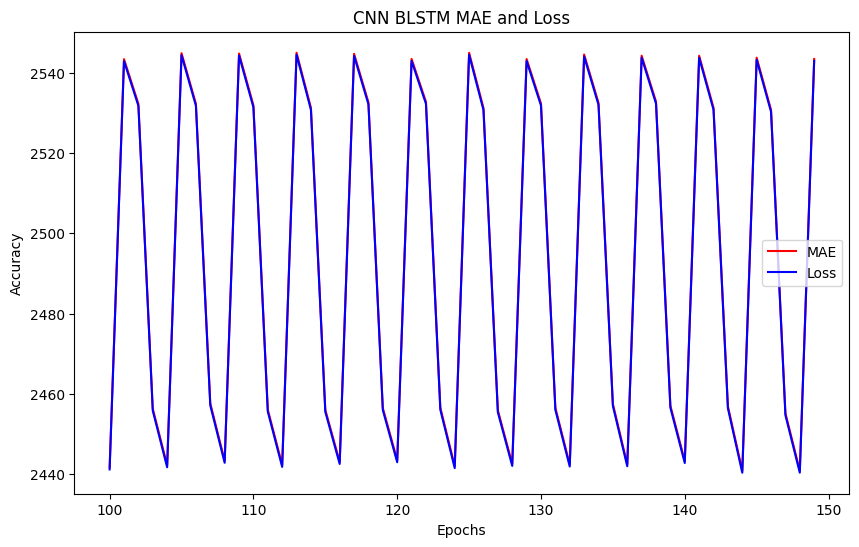

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_blstm.history['mae']
loss=history_cnn_blstm.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN BLSTM MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [40]:
# Add Model Details to the benchmark list
Benchmark  = Benchmark.append(pd.Series(['CNN BLSTM', 'Conv1D, 2*BLSTM, 2*LSTM, 2*Dense', '32, 2*32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)

<ipython-input-40-4cb83fb0011b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['CNN BLSTM', 'Conv1D, 2*BLSTM, 2*LSTM, 2*Dense', '32, 2*32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


# CNN GRU Model

In [41]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size) # We take a window of x_train
print("train_set= ",train_set)
print("\n x_train.shape= ",x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]), # We have specified the input shape here so we need to change the windowed_dataset() => it works but foes not give the same result
  tf.keras.layers.GRU(64, return_sequences=True),
  tf.keras.layers.GRU(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_gru = model.fit(train_set, epochs=150)


train_set=  <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

 x_train.shape=  (2500,)


Epoch 1/150
10/10 [==============================] - 5s 25ms/step - loss: 62708359168.0000 - mae: 62708359168.0000
Epoch 2/150
10/10 [==============================] - 1s 36ms/step - loss: 4532.9316 - mae: 4533.4316
Epoch 3/150
10/10 [==============================] - 1s 38ms/step - loss: 4769.2515 - mae: 4769.7515
Epoch 4/150
10/10 [==============================] - 1s 37ms/step - loss: 5765.0459 - mae: 5765.5459
Epoch 5/150
10/10 [==============================] - 1s 38ms/step - loss: 4858.3057 - mae: 4858.8057
Epoch 6/150
10/10 [==============================] - 1s 34ms/step - loss: 4728.4795 - mae: 4728.9795
Epoch 7/150
10/10 [==============================] - 1s 37ms/step - loss: 5736.1621 - mae: 5736.6621
Epoch 8/150
10/10 [==============================] - 1s 34ms/step - loss: 4916.0088 - mae: 4916.5088
Epoch 9/150
10/10 [==============================] - 1s 40ms/step - loss: 4801.6050 - mae: 4802.1050
Epoch 10/150
10/10 [==============================] - 1s 41ms/step - loss: 57

# CNN GRU MAE & Loss

<Figure size 640x480 with 0 Axes>

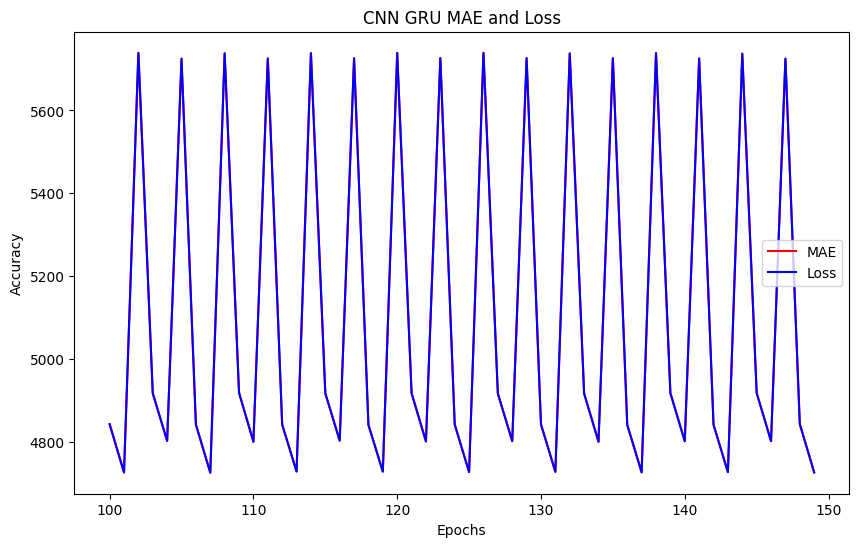

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae  = history_cnn_gru.history['mae']
loss = history_cnn_gru.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN GRU MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [43]:
# Add Model Details to the benchmark list
Benchmark  = Benchmark.append(pd.Series(['CNN GRU', 'Conv1D, 2*GRU, 2*Dense', '32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)
Benchmark

<ipython-input-43-37b9ebc207bf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['CNN GRU', 'Conv1D, 2*GRU, 2*Dense', '32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.500000,73342.000000
1,LSTM,"2*LSTM, 2*Dense","2*40, 30 10","SGD(lr=1e-5, momentum=0.9)",51.246494,50.749012
2,BLSTM,2*BLSTM,32,"SGD(lr=1e-5, momentum=0.9)",51.174549,50.676487
3,CNN LSTM,"Conv1D, 2*LSTM, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",875.477905,874.977905
4,CNN BLSTM,"Conv1D, 2*BLSTM, 2*LSTM, 2*Dense","32, 2*32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",2543.421875,2542.921875
5,CNN GRU,"Conv1D, 2*GRU, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",4727.239258,4726.739258


# CNN BIGRU Model

In [44]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Windowed CNN BLSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),

  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),

  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),

  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),

  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history_cnn_bigru = model.fit(dataset, epochs=150)

Epoch 1/150
10/10 [==============================] - 10s 40ms/step - loss: 91526.3984 - mae: 91526.9062
Epoch 2/150
10/10 [==============================] - 1s 51ms/step - loss: 2236.9387 - mae: 2237.4387
Epoch 3/150
10/10 [==============================] - 1s 85ms/step - loss: 2735.3696 - mae: 2735.8696
Epoch 4/150
10/10 [==============================] - 1s 78ms/step - loss: 2395.5691 - mae: 2396.0691
Epoch 5/150
10/10 [==============================] - 1s 45ms/step - loss: 2458.2097 - mae: 2458.7097
Epoch 6/150
10/10 [==============================] - 1s 46ms/step - loss: 2275.3606 - mae: 2275.8606
Epoch 7/150
10/10 [==============================] - 1s 44ms/step - loss: 2803.6853 - mae: 2804.1853
Epoch 8/150
10/10 [==============================] - 1s 44ms/step - loss: 2390.9919 - mae: 2391.4919
Epoch 9/150
10/10 [==============================] - 1s 45ms/step - loss: 2447.3486 - mae: 2447.8486
Epoch 10/150
10/10 [==============================] - 1s 43ms/step - loss: 2275.6250 - m

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, None, 32)          192       
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         12672     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 64)         18816     
 nal)                                                            
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          3

# CNN BIGRU MAE & Loss

<Figure size 640x480 with 0 Axes>

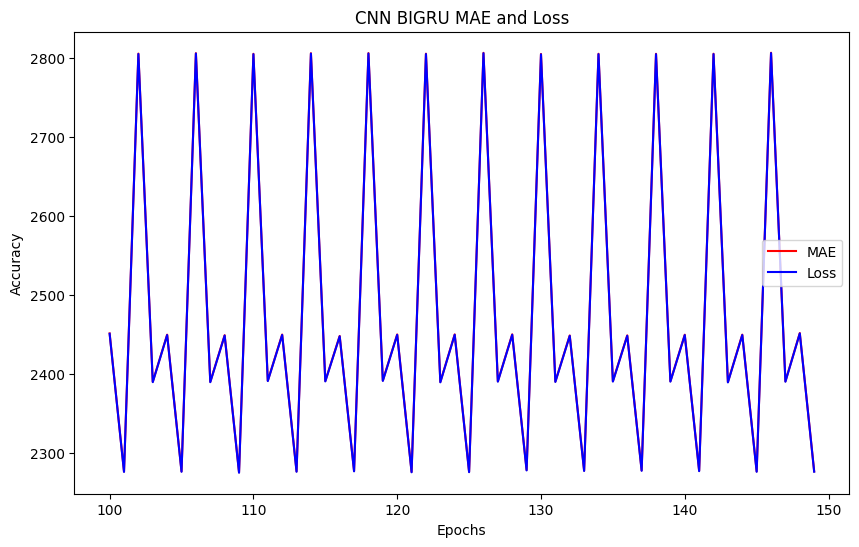

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history_cnn_bigru.history['mae']
loss=history_cnn_bigru.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------


epochs_zoom = epochs[100:150]
mae_zoom = mae[100:150]
loss_zoom = loss[100:150]


plt.figure(figsize=(10, 6))

plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('CNN BIGRU MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [47]:
# Add Model Details to the benchmark list
Benchmark  = Benchmark.append(pd.Series(['CNN BIGRU', 'Conv1D, 2*BIGRU, 2*BIGRU, 2*Dense', '32, 2*32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)
Benchmark

<ipython-input-47-153a24599f33>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Benchmark  = Benchmark.append(pd.Series(['CNN BIGRU', 'Conv1D, 2*BIGRU, 2*BIGRU, 2*Dense', '32, 2*32, 2*64, 30 10', 'SGD(lr=1e-5, momentum=0.9)', mae[-1], loss[-1]], index = columns), ignore_index=True)


,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.500000,73342.000000
1,LSTM,"2*LSTM, 2*Dense","2*40, 30 10","SGD(lr=1e-5, momentum=0.9)",51.246494,50.749012
2,BLSTM,2*BLSTM,32,"SGD(lr=1e-5, momentum=0.9)",51.174549,50.676487
3,CNN LSTM,"Conv1D, 2*LSTM, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",875.477905,874.977905
4,CNN BLSTM,"Conv1D, 2*BLSTM, 2*LSTM, 2*Dense","32, 2*32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",2543.421875,2542.921875
5,CNN GRU,"Conv1D, 2*GRU, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",4727.239258,4726.739258
6,CNN BIGRU,"Conv1D, 2*BIGRU, 2*BIGRU, 2*Dense","32, 2*32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",2276.571777,2276.071777


# Benchmark

In [48]:
Benchmark

,Model,Layers,Units_per_Layer,Optimizer,MAE Metric,Huber Loss
0,RNN,2*SimpleRNN,40,"SGD(lr=1e-5, momentum=0.9)",73342.500000,73342.000000
1,LSTM,"2*LSTM, 2*Dense","2*40, 30 10","SGD(lr=1e-5, momentum=0.9)",51.246494,50.749012
2,BLSTM,2*BLSTM,32,"SGD(lr=1e-5, momentum=0.9)",51.174549,50.676487
3,CNN LSTM,"Conv1D, 2*LSTM, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",875.477905,874.977905
4,CNN BLSTM,"Conv1D, 2*BLSTM, 2*LSTM, 2*Dense","32, 2*32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",2543.421875,2542.921875
5,CNN GRU,"Conv1D, 2*GRU, 2*Dense","32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",4727.239258,4726.739258
6,CNN BIGRU,"Conv1D, 2*BIGRU, 2*BIGRU, 2*Dense","32, 2*32, 2*64, 30 10","SGD(lr=1e-5, momentum=0.9)",2276.571777,2276.071777


In [49]:
print('Best Model MAE  wise:\n', Benchmark[Benchmark['MAE Metric'] == Benchmark['MAE Metric'].min()])
print('Best Model Loss wise:\n', Benchmark[Benchmark['Huber Loss'] == Benchmark['Huber Loss'].min()])

Best Model MAE  wise:
    Model   Layers Units_per_Layer                   Optimizer  MAE Metric  \
2  BLSTM  2*BLSTM              32  SGD(lr=1e-5, momentum=0.9)   51.174549   

   Huber Loss  
2   50.676487  
Best Model Loss wise:
    Model   Layers Units_per_Layer                   Optimizer  MAE Metric  \
2  BLSTM  2*BLSTM              32  SGD(lr=1e-5, momentum=0.9)   51.174549   

   Huber Loss  
2   50.676487  
